# MultiFigurePlotter 
Draws the figures contained in a list in corresponding subplots.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from hyperpyper.plotting import MultiFigurePlotter

In [2]:
def generate_figures():
    """
    Generates several figures and stores each figure handle in a list.
    """
    figures = []

    # Figure 1: Histogram
    fig1 = plt.figure()
    data = np.random.normal(loc=0, scale=1, size=1000)
    plt.hist(data, bins=30, color='blue', alpha=0.5, label="label A")
    plt.title("Histogram", fontsize=20, fontweight='bold', fontfamily='serif')
    plt.xlabel("Value", fontsize=12, fontweight='bold', color='red', fontfamily='Courier New')
    plt.ylabel("Frequency")
    plt.gca().set_yticklabels(plt.gca().get_yticklabels(), fontsize=14, color='blue', fontfamily='Arial')
    plt.legend()
    # Set figure background color
    fig1.get_axes()[0].set_facecolor('gray')
    figures.append(fig1)

    # RGB Image with random content and frame
    fig2 = plt.figure()
    image_data = np.random.rand(100, 100, 3)
    plt.imshow(image_data)
    plt.gca().tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    plt.title("Random RGB Image")
    figures.append(fig2)

    # Grayscale Image with random content without frame
    fig3 = plt.figure()
    image_data = np.random.rand(100, 100)
    plt.imshow(image_data, cmap='gray')
    plt.gca().tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    plt.gca().set_axis_off()
    plt.title("Random Grayscale Image")
    figures.append(fig3)

    # Line plots and some text
    fig4 = plt.figure()
    x = np.linspace(0, 10, 100)
    y = np.sin(x)
    plt.plot(x, y, label='Sin(x)')
    plt.fill_between(x, y-0.1, y+0.1, color='magenta', alpha=0.2, edgecolor ='black', linestyle='-.', linewidth=2, label='fill_between')
    plt.axvline(x=5, color='red', linestyle='-', label='axvline')
    plt.axhline(y=1.2, color='blue', linestyle='--', label='axhline')
    plt.plot([6, 6], [0, 1], color='green', linestyle='-.', label='plot hor.')
    plt.plot([-1, 0, 1], [-1, 0, 1], color='black', linestyle=':', label='plot diag.')


    plt.text(2., 0., 'Bold Blue Text', color='blue', fontsize=12, fontweight='bold', ha='center', va='center')
    plt.title("Line Plots with Legend")
    plt.xlabel("X")
    plt.ylabel("Y")
    legend = plt.legend()
    legend.get_texts()[0].set_fontweight('bold')

    figures.append(fig4)

    # Scatter plot
    fig5 = plt.figure()
    x = np.linspace(0, 10, 100)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = y1-y2
    plt.scatter(x, y1, label='Sin(x)', marker='o', color='red', edgecolor='black', linewidth=2, linestyle=':', zorder=2)
    plt.scatter(x, y2, label='Cos(x)', marker='v', color='blue', alpha=0.3, s=100)
    plt.scatter(x, y3, label='Sin(x)-Cos(x)', c=x, cmap='plasma', alpha=0.5, s=100)
    plt.title("Scatter Plots without Legend")
    plt.xlabel("X")
    plt.ylabel("Y")
    figures.append(fig5)

    # Pie plot
    fig6 = plt.figure()
    data_36 = [i/10 for i in range(1, 37)]
    colormap = plt.cm.plasma(data_36 / np.max(data_36))
    # Create equal values for equally sized segments
    n_segments = len(data_36)
    equal_values = np.ones(n_segments)

    plt.pie(equal_values, colors=colormap, startangle=45)
    plt.axis('equal')
    plt.title("Pie Chart without Legend")
    figures.append(fig6)

    # QuadMesh
    fig7 = plt.figure()
    mesh_data = np.random.rand(20, 30)
    mesh = plt.pcolormesh(
        mesh_data,
        cmap='tab10',
        norm=colors.LogNorm(vmin=mesh_data.min(), vmax=mesh_data.max()),
        edgecolors='k',
        linewidth=0.5,
        shading='flat', # Shading type: 'flat' or 'gouraud'
        alpha=1.0
    )
    plt.title("QuadMesh without colorbar")
    figures.append(fig7)


    fig8 = plt.figure()
    mesh_data = np.random.rand(100, 100)
    mesh = plt.pcolormesh(
        mesh_data,
        cmap='viridis',
        norm=colors.LogNorm(vmin=mesh_data.min(), vmax=mesh_data.max()),
        edgecolors='k',
        linewidth=0.,
        shading='gouraud', # Shading type: 'flat' or 'gouraud'
        alpha=1.0
    )
    plt.title("QuadMesh with colorbar")
    # Add a colorbar
    fig8.colorbar(mesh, ax=plt.gca())

    figures.append(fig8)


    time = np.linspace(2,3,36)
    frequency = np.linspace(2,7,72)
    spectrogram = np.random.rand(72, 36)
    fig9, ax = plt.subplots(nrows=1, ncols=1)
    ax.pcolormesh(time,
        frequency,
        spectrogram,
        cmap='hot',
        norm=colors.LogNorm(vmin=spectrogram.min(),
            vmax=spectrogram.max()))
    plt.title("QuadMesh with coordinates")
    
    figures.append(fig9)


    return figures

C:\Users\bernh\AppData\Local\Temp\ipykernel_10300\839626167.py:14: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



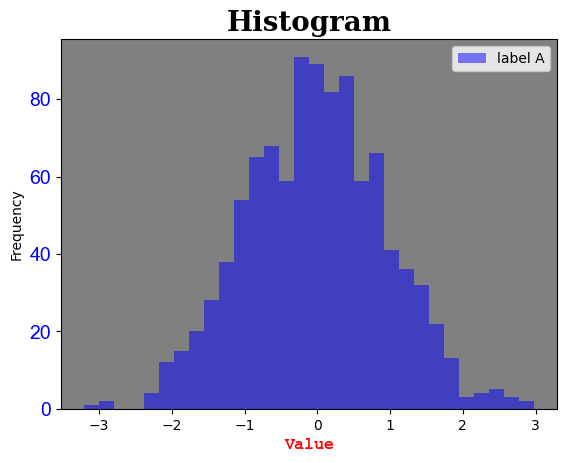

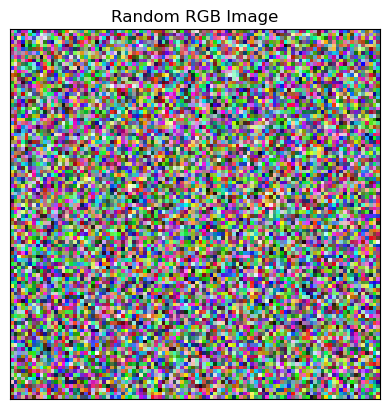

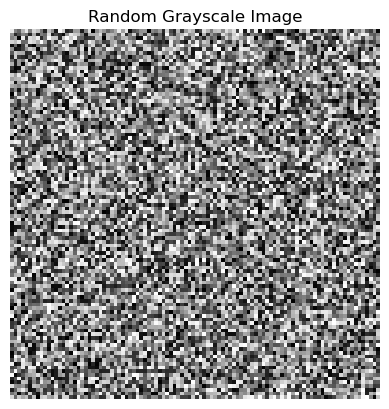

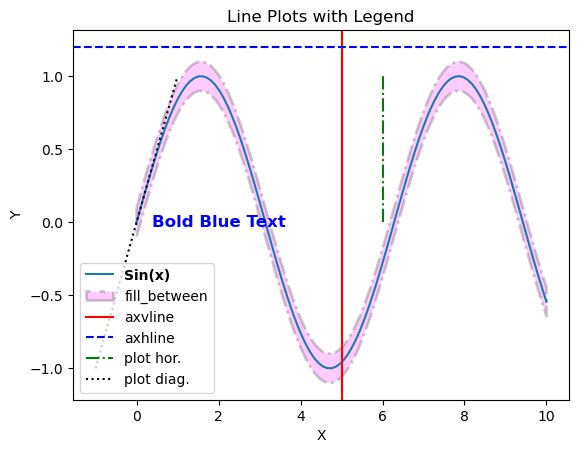

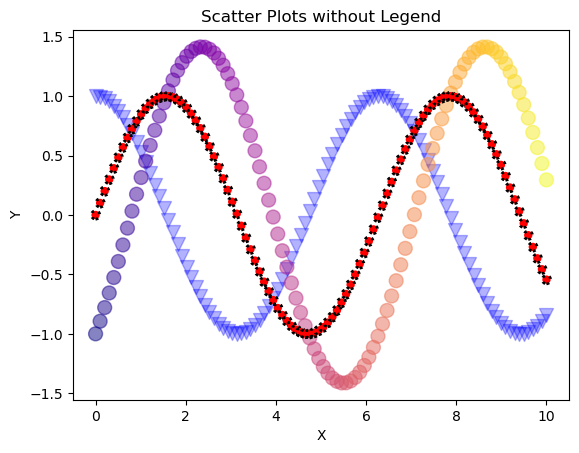

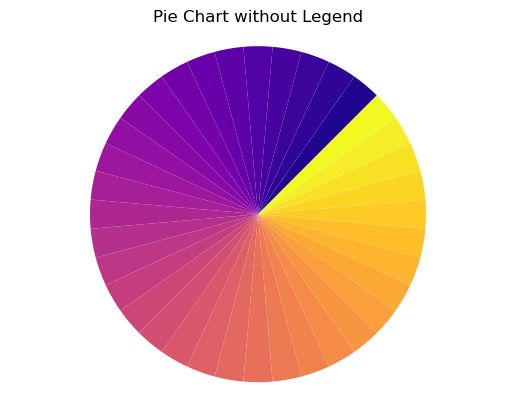

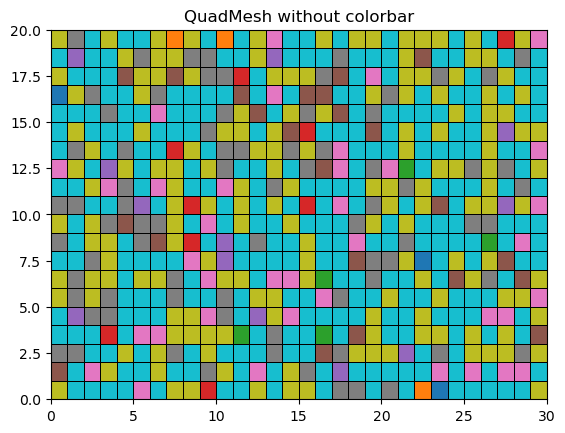

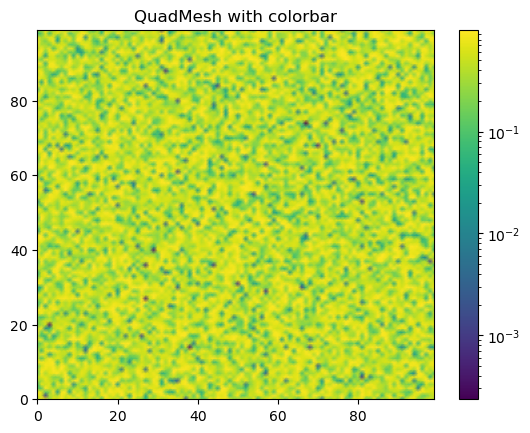

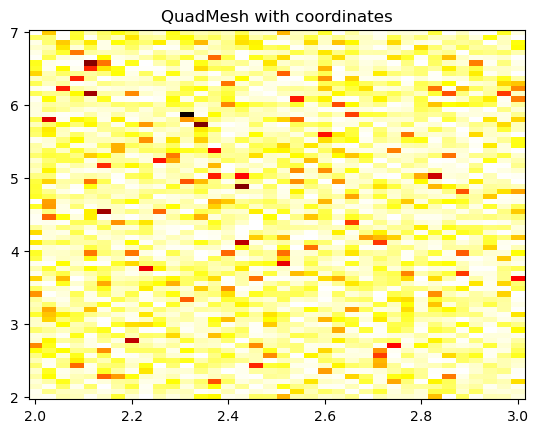

In [3]:
generated_figures = generate_figures()

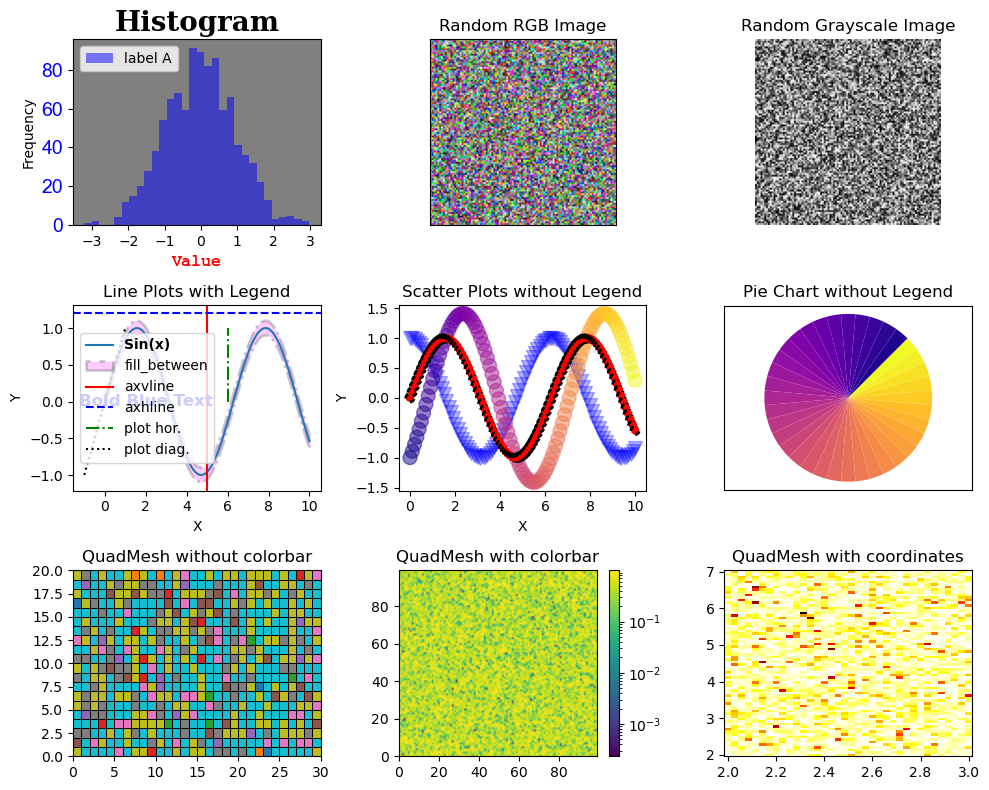

In [4]:
multifig = MultiFigurePlotter(generated_figures, figsize=(10,8)).plot()

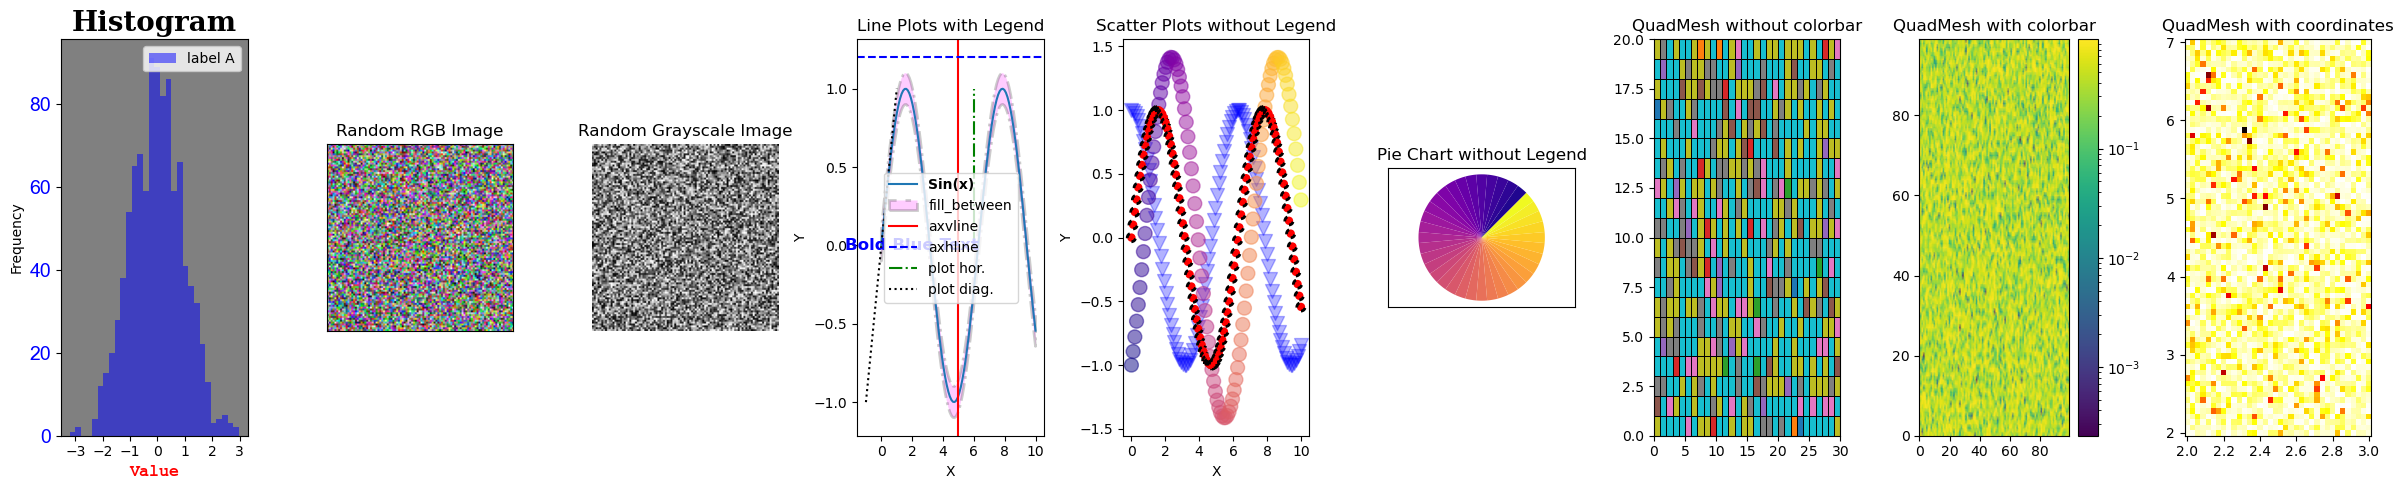

In [5]:
multifig = MultiFigurePlotter(generated_figures, figsize=(24,5), layout='vector').plot()

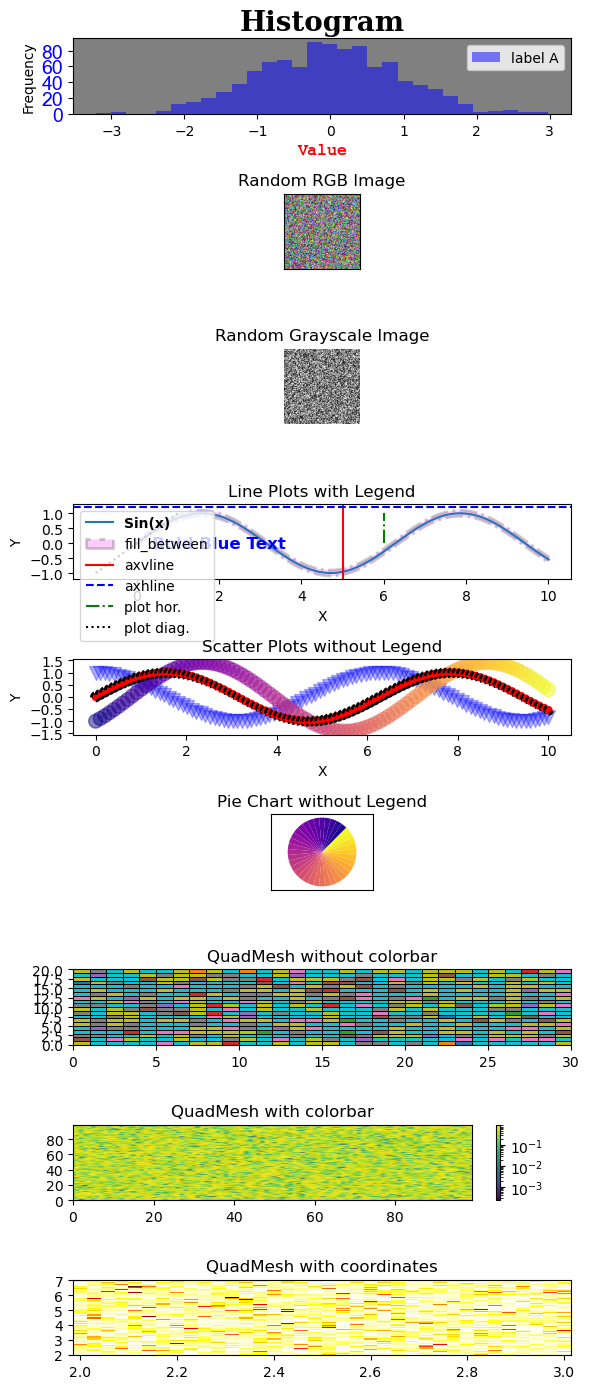

In [6]:
multifig = MultiFigurePlotter(generated_figures, figsize=(6,14), layout='vector', rotate=True).plot()

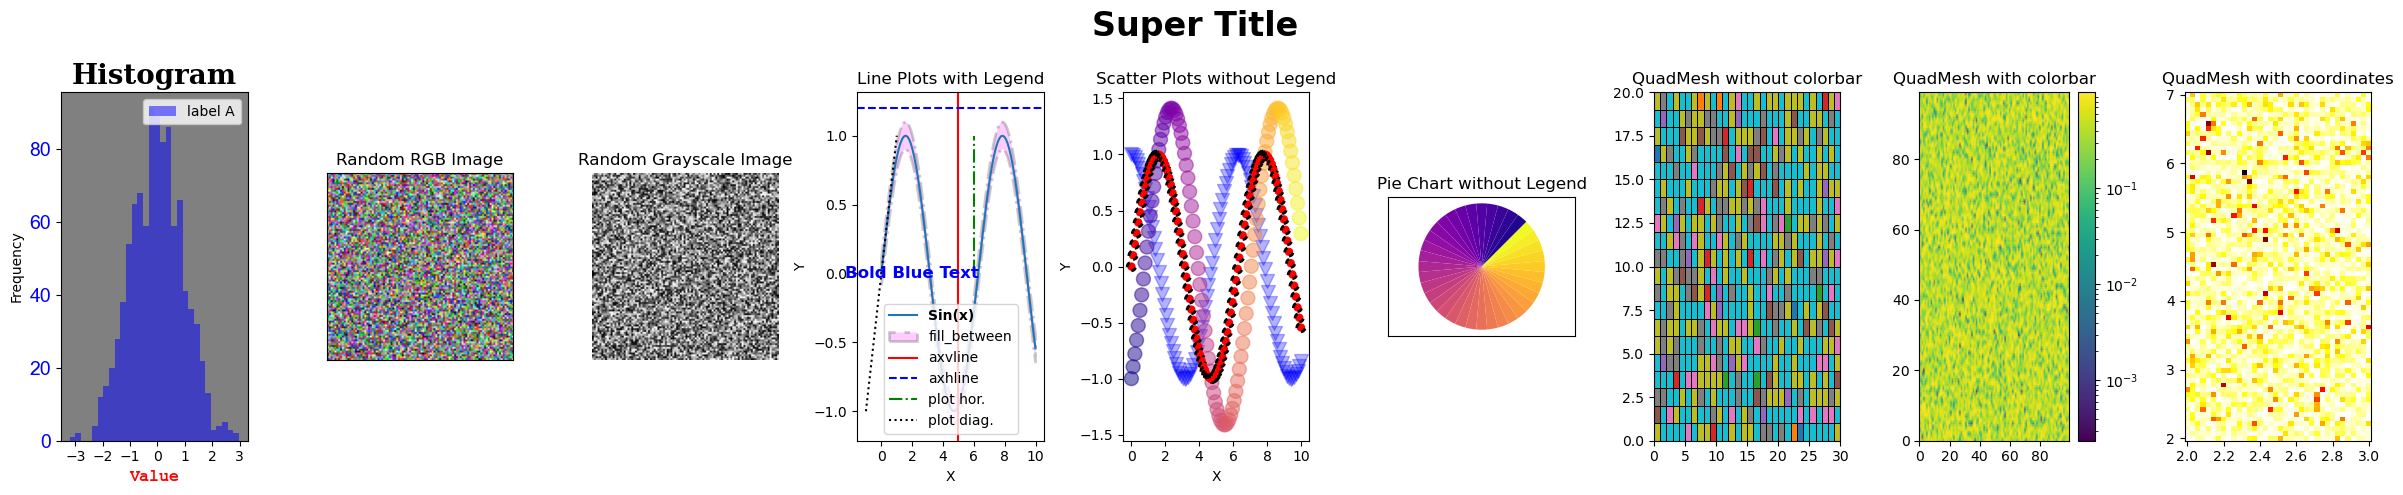

In [7]:
multifig = MultiFigurePlotter(generated_figures, figsize=(24,5), layout='vector',
    suptitle="Super Title", suptitle_fontsize=24, suptitle_fontweight='bold').plot()

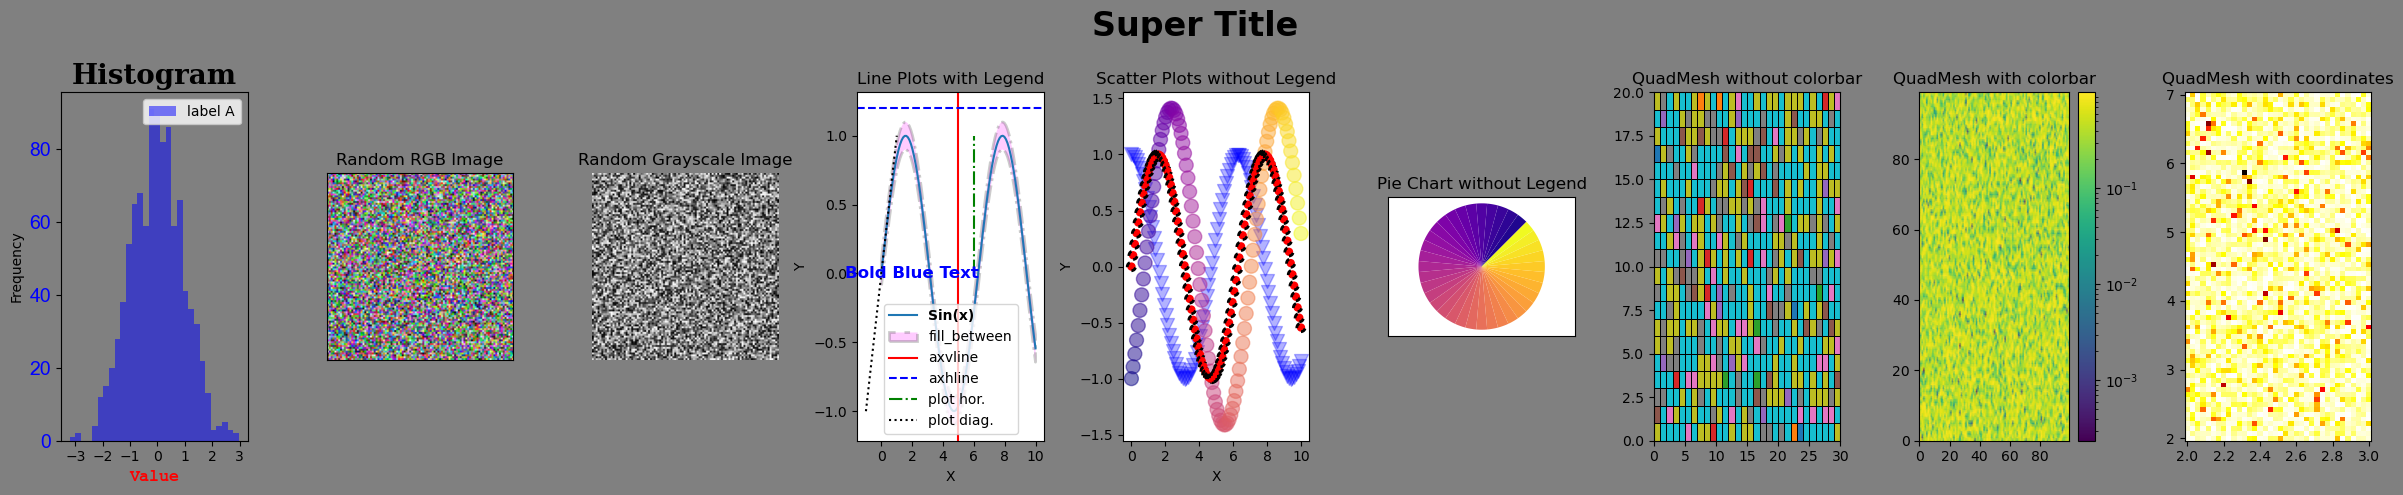

In [8]:
multifig = MultiFigurePlotter(generated_figures, figsize=(24,5), layout='vector',
    suptitle="Super Title", suptitle_fontsize=24, suptitle_fontweight='bold', facecolor='gray').plot()

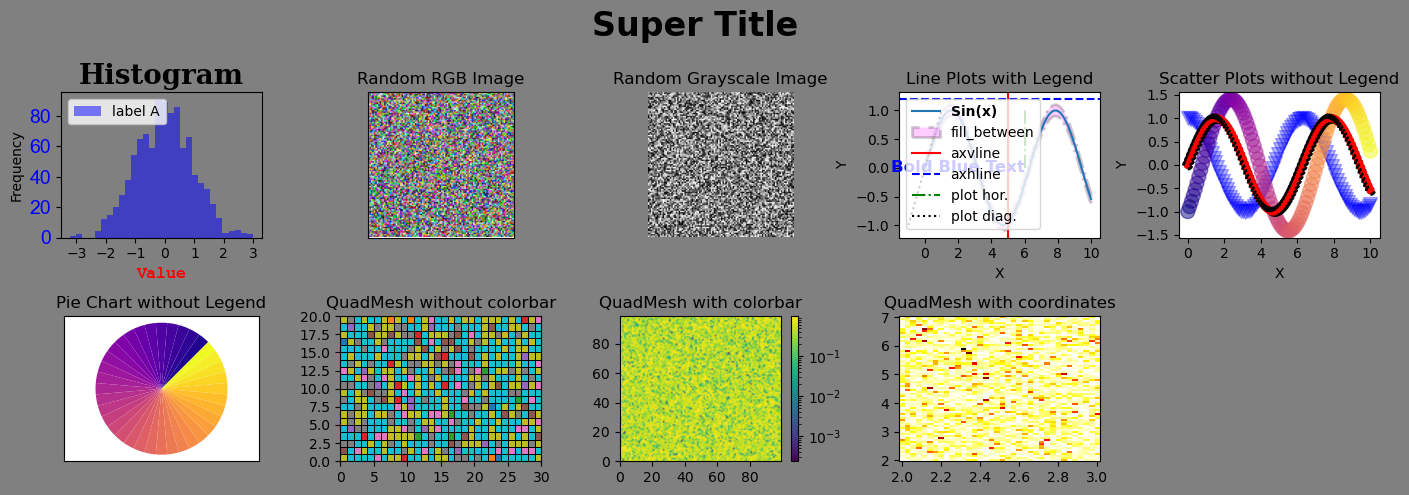

In [9]:
multifig = MultiFigurePlotter(generated_figures, figsize=(14,5), layout=(2,5),
    suptitle="Super Title", suptitle_fontsize=24, suptitle_fontweight='bold', facecolor='gray').plot()